In [14]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.font_manager as fm
from pylab import plot, show
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
mpl.rcParams["axes.unicode_minus"] = False
from wordcloud import WordCloud

In [12]:
def wordcloud(Text):
    data = Text.vocab().most_common(100)

    wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='pink',
                          ).generate_from_frequencies(dict(data))
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [1]:
def graph(data):
    plt.figure(figsize=(15, 6))
    data.plot(50)
    plt.show()

In [19]:
def nouns(file):
    global text1
    df = pd.read_csv("data/{}.csv".format(file))
    
    # 평점 3이하 제거
    idx = df[df['point']<=3].index
    df = df.drop(idx)
    # 중복 제거
    df.dropna(inplace=True)
    df.drop_duplicates(['review'], keep = 'first', ignore_index=True, inplace=True)
    # date열 제거 (불필요하다고 판단)
    del df['date']
    # Unnamed: 0열 제거
    del df['Unnamed: 0']
    
    import nltk
    from konlpy.tag import Okt
    Okt=Okt()
    
    # 명사 추출 후 tokens에 저장
    df["noun"] = df["review"].apply(Okt.nouns)

    tokens = [take2 for take1 in df["noun"] for take2 in take1]
    text = nltk.Text(tokens, name="NMSC")
    
    # 불용어 처리 후 text1에 다시 저장
    stop_words = ['제품', '구매', '사용', '것', '때', '거', '더', '용량', '일', '진짜', '저', '배송', '통째', '좀', '또',
              '임', '이', '항상', '보고', '아주', '정말', '정도', '구입', '통', '생각', '용', '형', '주문', '제', '템',
              '번', '전', '때문', '바로', '후', '요즘', '다음', '벌써', '날', '일단', '늘', '걸', '상품', '다른', '쟁',
              '끈', '감', '금방', '안', '중', '사서', '요']

    tokens1 = [each_word for each_word in tokens
              if each_word not in stop_words]
    text1 = nltk.Text(tokens1)

    

### 머그워트

In [10]:
# 형태소 저장
nouns("final_mug")

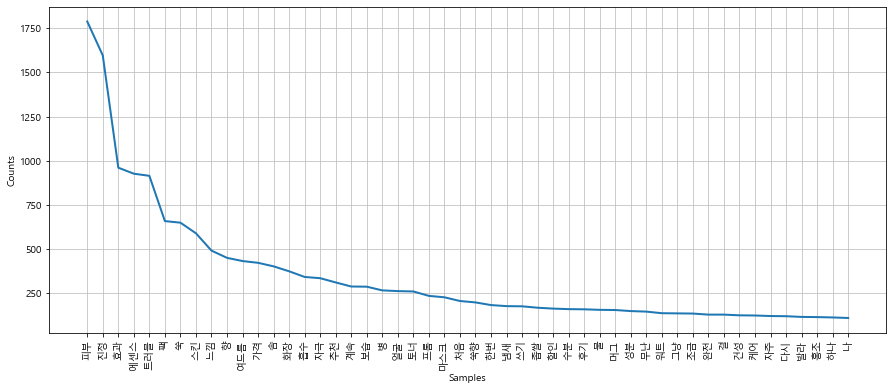

In [11]:
# 빈도 그래프
graph(text1)

In [ ]:
"""
피부 - 당연하지만 피부에 관한 제품이다.
진정 - 머그워트는 피부 진정에 관한 제품이라고 볼 수 있다.
효과 - 리뷰 포인트 4점 이상 기준 효과가 좋다라고 볼 수 있다.
에센스 - 에센스로도 출시되는 상품이다.
트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.
팩 - 팩으로도 출시되는 상품이다.
쑥 - 머그워트가 영어로 쑥이라고 한다.
스킨 - 스킨으로도 출시되는 상품이다.
느낌 - 구매자들이 느낌을 어느정도 중요시 한다.
향 - 구매자들이 향을 어느정도 중요시 한다.
여드름 - 여드름에 관련된 상품이라고 생각 할 수 있다.
"""

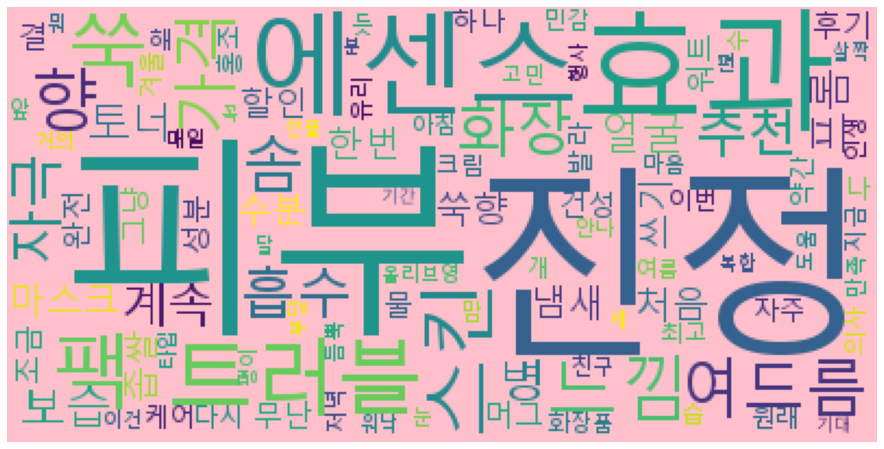

In [15]:
# 워드 클라우드
wordcloud(text1)

### 프로폴리스


In [16]:
# 형태소 저장
nouns("final_propol")

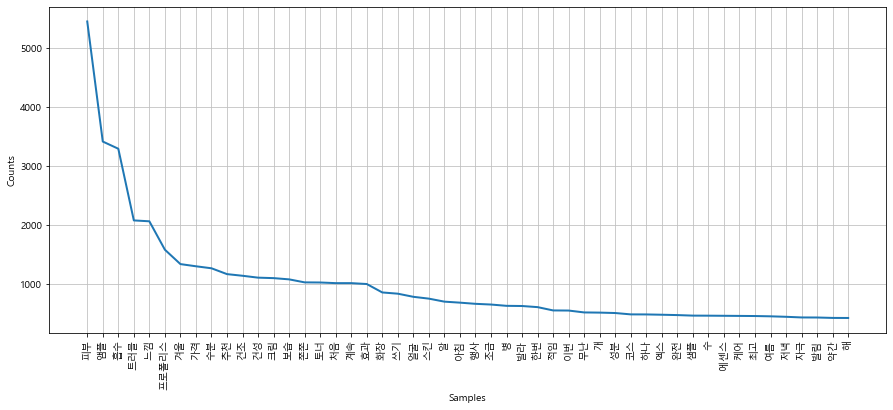

In [17]:
# 빈도 그래프
graph(text1)

In [ ]:
"""
피부 - 피부에 관련된 제품이다.
흡수 - 흡수가 잘되는 제품이라고 추측 해 볼 수 있다.
트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.
느낌 - 특별한 느낌이 있다고 생각해 볼 수 있다.
프로폴리스 - 성분의 이름이다.
겨울 - 겨울피부과 관련이 있다고 생각해 볼 수 있다.(건조)
가격 - 가격을 신경쓰는 사람들이 꽤나 있다.
수분 - 수분에 관련된 제품이라고 생각해 볼 수 있다.(겨울과 연관)
건조, 건성 - 피부가 건조한 구매자가 꽤나 있다고 추측해 볼 수 있다.
"""

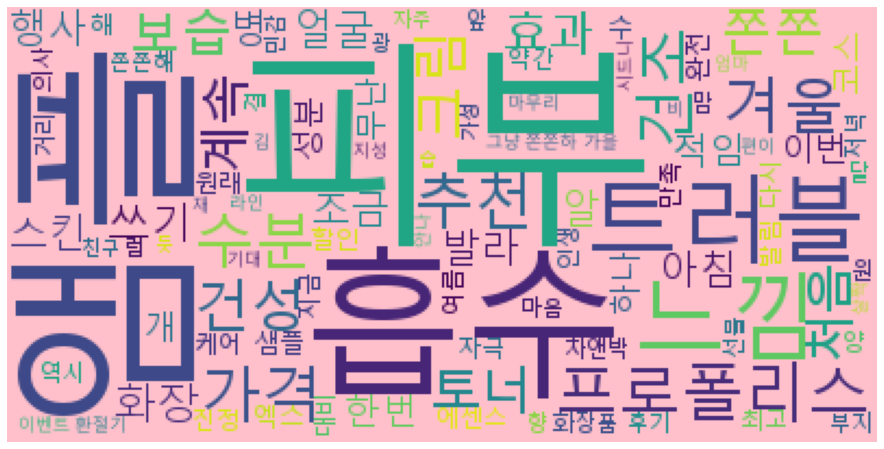

In [18]:
# 워드 클라우드
wordcloud(text1)

### 나이아신아마이드


In [20]:
# 형태소 저장
nouns("final_niasin")

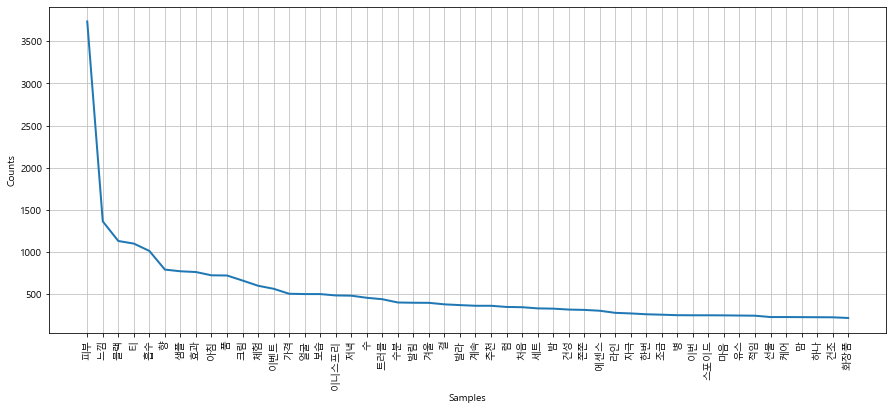

In [21]:
# 빈도 그래프
graph(text1)

In [ ]:
"""
피부 - 피부에 관한 제품이다.
느낌 - 구매자들은 느낌을 꽤나 중요시한다.
블랙 - 제품 색상을 유추해 볼 수 있다.
티 - ?
흡수 - 흡수에 관해 효과가 있는 제품이라고 추측할 수 있다.
향 - 향을 꽤나 언급했다.
아침 - 아침에 사용하는 사람이 꽤나 있다.
보습 - 보습에 관해 효과가 있는 제품이라고 추측할 수 있다.
"""

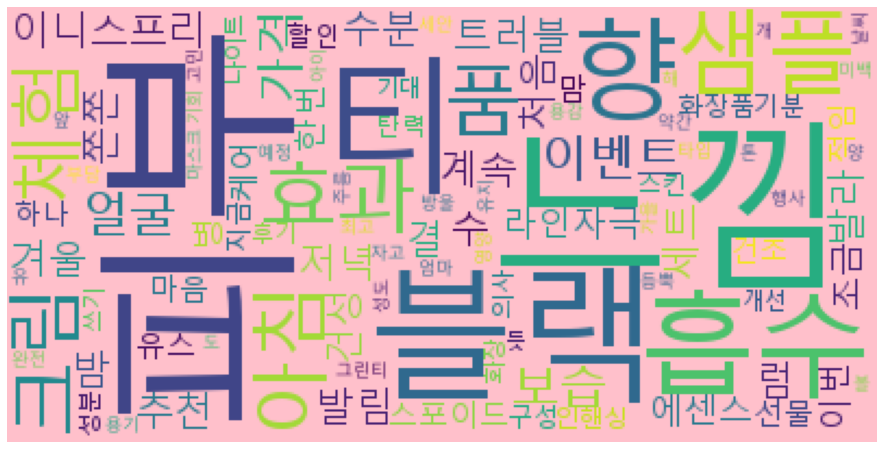

In [22]:
# 워드 클라우드
wordcloud(text1)